In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import utils
import pandas as pd
import seaborn as sns
from functools import partial
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from scipy import stats

In [44]:
n = 500
sigma = np.random.exponential(1, size=n)
a_bar = np.random.normal(0, 1, size=n)
a = np.random.normal(a_bar, sigma, size=n)

<AxesSubplot:>

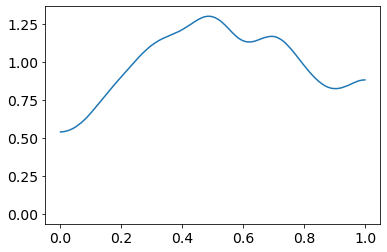

In [45]:
az.plot_dist(utils.sigmoid(a))

In [55]:
df = pd.read_csv("data/reedfrogs.csv", sep=";")
df.head()

,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9


In [61]:
df['size'] = pd.Categorical(df["size"], categories=["small", "big"], ordered=True)
df['pred'] = pd.Categorical(df["pred"], categories=["no", "yes"])
df.head()

,density,pred,size,surv,propsurv
0,10,no,big,9,0.9
1,10,no,big,10,1.0
2,10,no,big,7,0.7
3,10,no,big,10,1.0
4,10,no,small,9,0.9


In [65]:
9/0.9

10.0

In [70]:
coords = {
    "size_dim": df["size"].cat.codes
}

with pm.Model() as model1:
    sigma = pm.Exponential("sigma", .1)
    a_bar = pm.Normal("a_bar", mu=0, sigma=0.2)
    a = pm.Normal("a", mu=a_bar, sigma=sigma)
    
    beta = pm.Normal("beta", mu=0, sigma=0.2)

    prob = a + beta
    p = pm.Deterministic("prod", pm.math.sigmoid(prob))

    n = (df.surv / df.propsurv).astype(int)
    pm.Binomial("p", n=n, p=p, observed=df.surv)

    trace1 = pm.sample(draws=500, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, a_bar, a, beta]


Sampling 1 chain for 1_000 tune and 500 draw iterations (1_000 + 500 draws total) took 2 seconds.


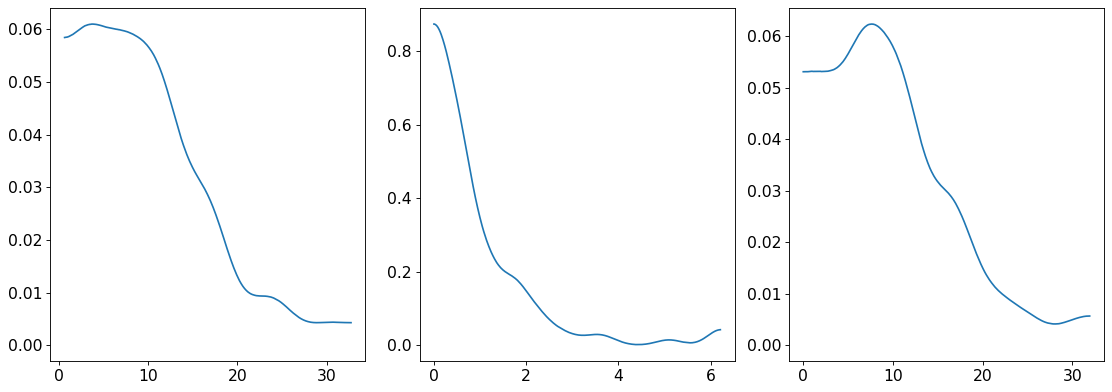

In [125]:
plt.figure(figsize=(14,5), dpi=80)
n = 200
mu = np.random.gamma(shape=2, scale=5, size=n)
sigma = np.random.exponential(1, size=n)

alpha = mu**2 / sigma**2
beta = mu / sigma**2

samples = stats.distributions.gamma(a=alpha, scale=1/beta).rvs(size=n)

plt.subplot(1,3,1)
az.plot_dist(mu)

plt.subplot(1,3,2)
az.plot_dist(sigma)

plt.subplot(1,3,3)
az.plot_dist(samples)
plt.tight_layout()

In [116]:
alpha.min()

-2.152347858904054